In [58]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [2]:
#reading data
df = pd.read_csv("abalone.data",header=None,names=['sex','length','dia','height','ww','sw','vw','sh_w','age'])

In [26]:
df.head()

,sex,length,dia,height,ww,sw,vw,sh_w,age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#cheching for unique values in age
df.age.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [5]:
#replacing object types with numbers
df.sex.replace({'M':0,"F":1,"I":2},inplace=True)

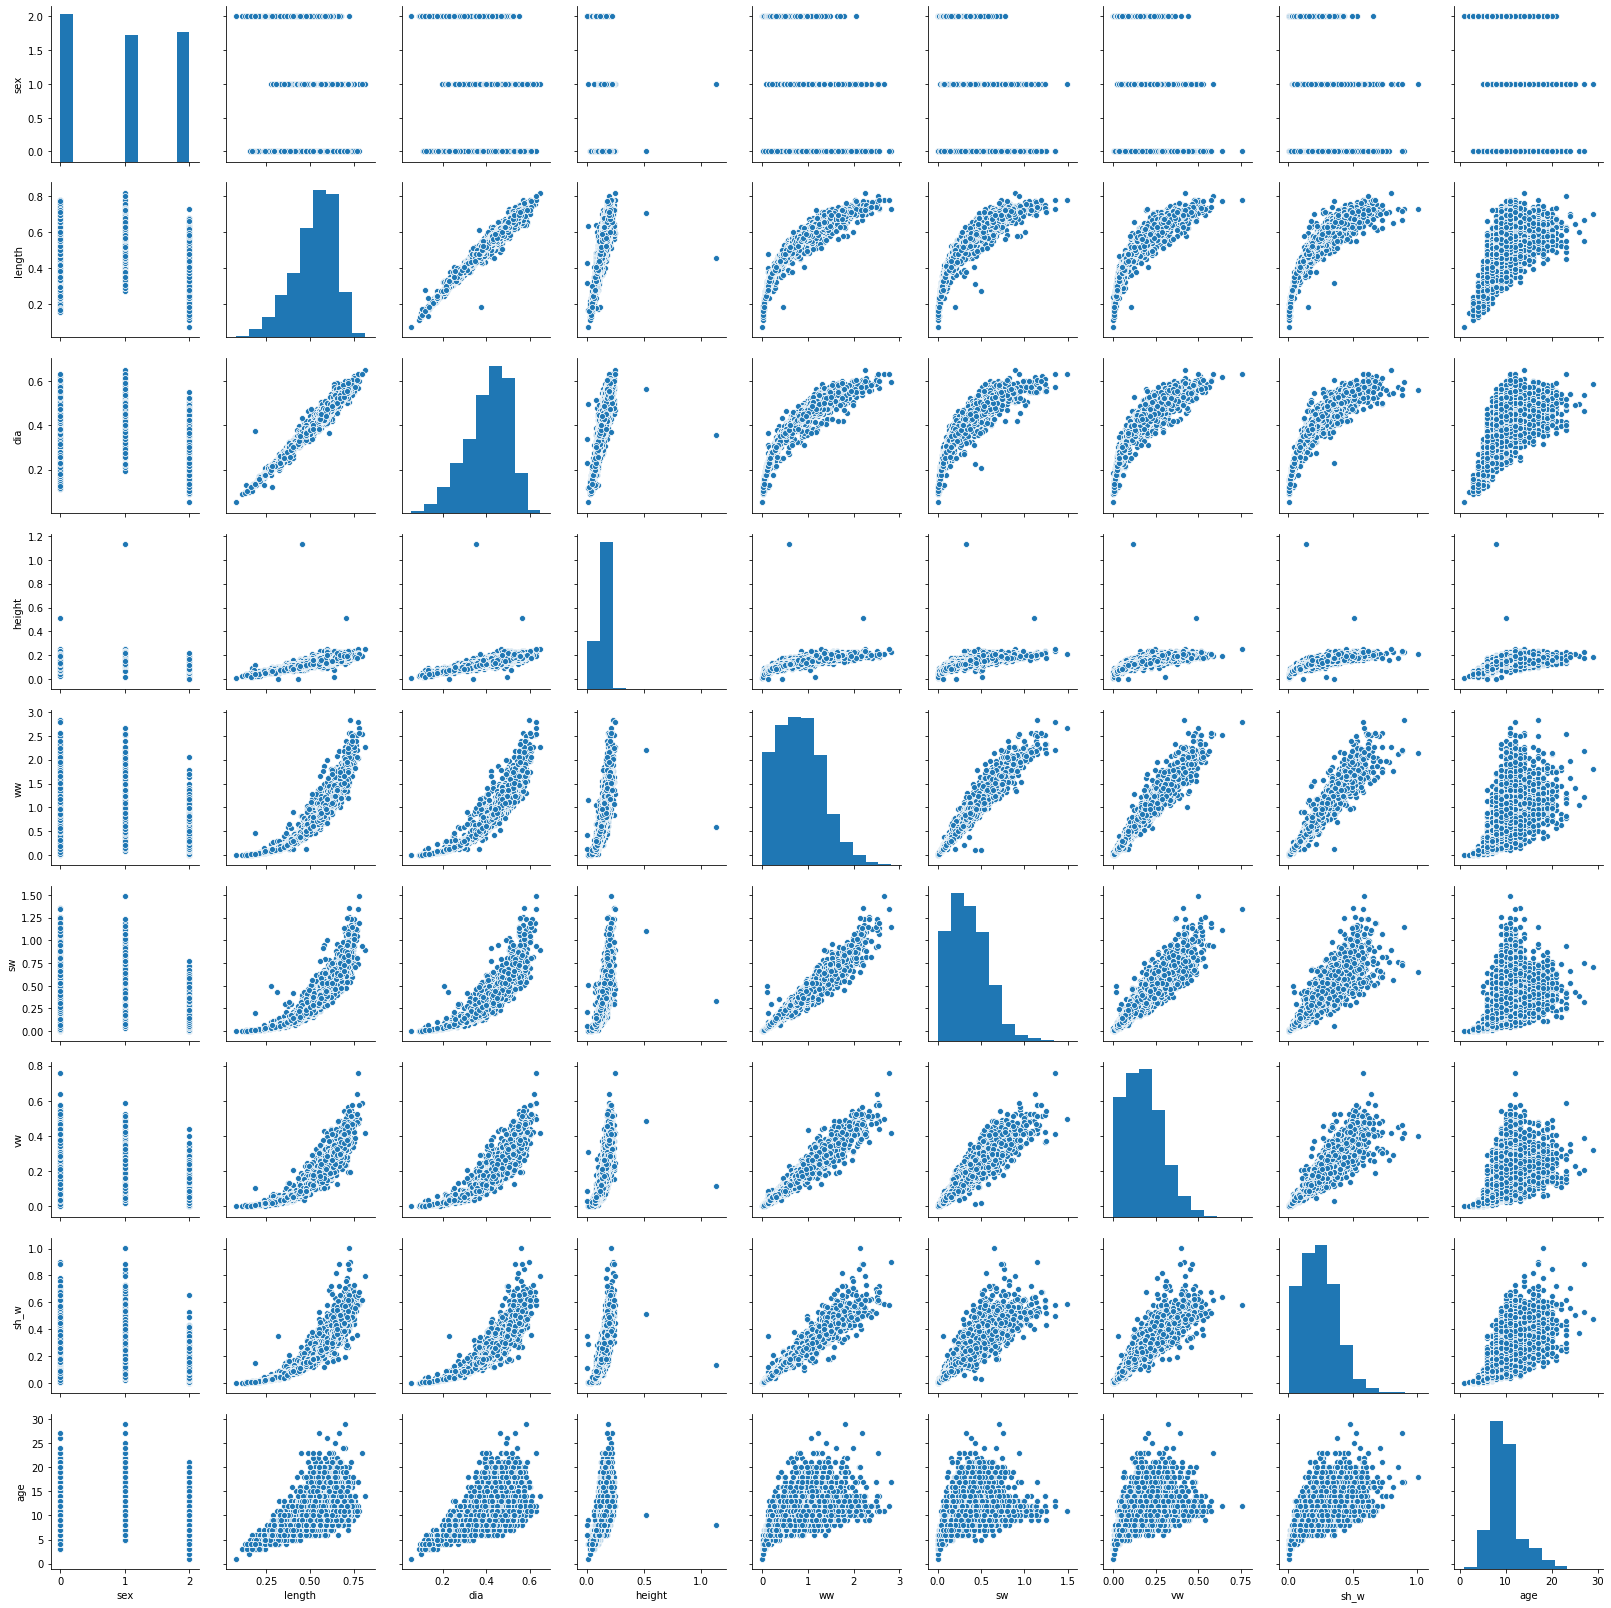

In [20]:
sns.pairplot(df)

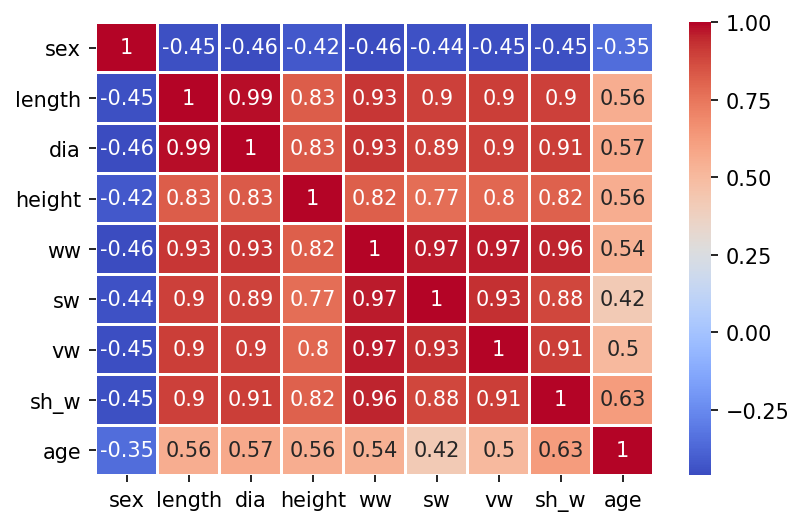

In [22]:
#checking correlation of dataset
plt.figure(dpi=150)
sns.heatmap(df.corr(),linewidths=1,cmap='coolwarm',annot=True)

In [54]:
df.columns

Index(['sex', 'length', 'dia', 'height', 'ww', 'sw', 'vw', 'sh_w', 'age'], dtype='object')

In [66]:
#selecting features
X = df[['length', 'dia', 'height', 'ww', 'sw', 'vw', 'sh_w']].values
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [68]:
#defining target
y = df['age'].values
y

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

In [71]:
#normalizing dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [ ]:
#train_test_split
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [73]:
#fitting training dataset in model

from sklearn import model_selection, neighbors
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
from sklearn import metrics
metrics.accuracy_score(y_train,clf.predict(X_train))

0.45615085303801256

In [80]:
scores = np.zeros(40)
for i in range(1,41):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    scores[i-1] = metrics.accuracy_score(y_test,clf.predict(X_test))
scores    

array([0.19138756, 0.21172249, 0.19019139, 0.21291866, 0.21291866,
       0.21172249, 0.20574163, 0.21770335, 0.20933014, 0.22607656,
       0.23086124, 0.23325359, 0.24401914, 0.23803828, 0.23684211,
       0.25239234, 0.24282297, 0.25      , 0.25239234, 0.24641148,
       0.25      , 0.25717703, 0.25956938, 0.24760766, 0.24162679,
       0.25239234, 0.24162679, 0.25239234, 0.24521531, 0.25239234,
       0.24521531, 0.26196172, 0.26555024, 0.27511962, 0.27511962,
       0.27511962, 0.27033493, 0.2715311 , 0.27033493, 0.26794258])